In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* **sibsp** - Number of Siblings/Spouses Aboard. 
* **parch**  - Number of Parents/Children Aboard. 
* **ticket** - Ticket Number. 
* **fare** - Passenger Fare.
* **Embarked** - embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop(['Cabin'],axis=1,inplace=True)

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
data.fillna(data['Age'].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [8]:
data.fillna(data['Embarked'].mode(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [9]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [10]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1.0


In [12]:
#Again Check the null value
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
data.fillna(0,inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Convert the Sex Column to Boolean

In [15]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
array = data['Sex']

array.shape

(891,)

In [17]:
le=LabelEncoder()
data1=le.fit_transform(data['Sex'])
data1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [18]:
data['Sex'] = data1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1.0


Find Out the Correlation between all Input datas and Output

In [19]:
data[['PassengerId','Survived']].corr()


,PassengerId,Survived
PassengerId,1.000000,-0.005007
Survived,-0.005007,1.000000


In [20]:
data[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [21]:
data[['Name','Survived']].corr()

,Survived
Survived,1.0


In [22]:
data[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,-0.543351
Survived,-0.543351,1.000000


In [23]:
data[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.069809
Survived,-0.069809,1.000000


In [24]:
data[['SibSp','Survived']].corr()

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


In [25]:
data[['Parch','Survived']].corr()

,Parch,Survived
Parch,1.000000,0.081629
Survived,0.081629,1.000000


In [26]:
data[['Ticket','Survived']].corr()

,Survived
Survived,1.0


In [27]:
data[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [28]:
data[['Embarked','Survived']].corr()

,Embarked,Survived
Embarked,1.000000,0.106811
Survived,0.106811,1.000000


Here At First We need to delete Name and Ticket because they are not correlated at all

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1.0


In [30]:
del data['Name']
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,0,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,1,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,0,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,1,26.000000,0,0,111369,30.0000,1.0


In [31]:
data.drop(['Ticket'],axis=1,inplace=True)

In [32]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0.0
1,2,1,1,0,38.000000,1,0,71.2833,1.0
2,3,1,3,0,26.000000,0,0,7.9250,0.0
3,4,1,1,0,35.000000,1,0,53.1000,0.0
4,5,0,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0.0
887,888,1,1,0,19.000000,0,0,30.0000,0.0
888,889,0,3,0,29.699118,1,2,23.4500,0.0
889,890,1,1,1,26.000000,0,0,30.0000,1.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 59.3 KB


In [34]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [35]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


PassengerId,Sibling,and Parch Values are not needed for Calculation So we are dropping these columns

In [36]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0.0
1,1,1,0,38.000000,1,0,71.2833,1.0
2,1,3,0,26.000000,0,0,7.9250,0.0
3,1,1,0,35.000000,1,0,53.1000,0.0
4,0,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0.0
887,1,1,0,19.000000,0,0,30.0000,0.0
888,0,3,0,29.699118,1,2,23.4500,0.0
889,1,1,1,26.000000,0,0,30.0000,1.0


In [38]:
data.drop(['SibSp'],axis=1,inplace=True)

In [39]:
data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.000000,0,7.2500,0.0
1,1,1,0,38.000000,0,71.2833,1.0
2,1,3,0,26.000000,0,7.9250,0.0
3,1,1,0,35.000000,0,53.1000,0.0
4,0,3,1,35.000000,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,13.0000,0.0
887,1,1,0,19.000000,0,30.0000,0.0
888,0,3,0,29.699118,2,23.4500,0.0
889,1,1,1,26.000000,0,30.0000,1.0


In [40]:
data.drop(['Parch'],axis=1,inplace=True)

In [41]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,0.0
1,1,1,0,38.000000,71.2833,1.0
2,1,3,0,26.000000,7.9250,0.0
3,1,1,0,35.000000,53.1000,0.0
4,0,3,1,35.000000,8.0500,0.0
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,0.0
887,1,1,0,19.000000,30.0000,0.0
888,0,3,0,29.699118,23.4500,0.0
889,1,1,1,26.000000,30.0000,1.0


In [42]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 38.4 KB


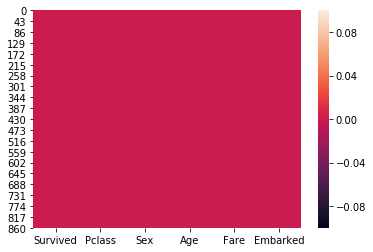

In [44]:
#Again checking Null Value through Graph
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [45]:
dfcor = data.corr()
dfcor

,Survived,Pclass,Sex,Age,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566,0.007461
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,0.007461,0.062142,1.000000


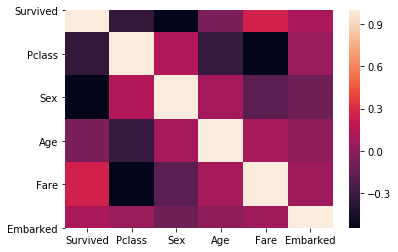

In [46]:
sns.heatmap(dfcor)

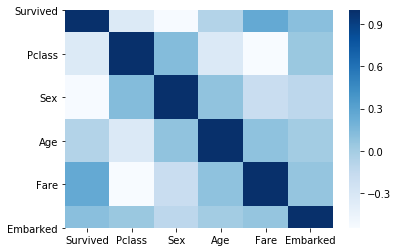

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

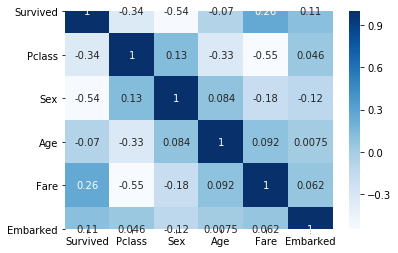

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Plotting Outliers

In [49]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [50]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,0.0
1,1,1,0,38.000000,71.2833,1.0
2,1,3,0,26.000000,7.9250,0.0
3,1,1,0,35.000000,53.1000,0.0
4,0,3,1,35.000000,8.0500,0.0
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,0.0
887,1,1,0,19.000000,30.0000,0.0
888,0,3,0,29.699118,23.4500,0.0
889,1,1,1,26.000000,30.0000,1.0


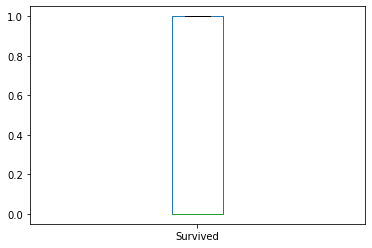

In [51]:
data['Survived'].plot.box()

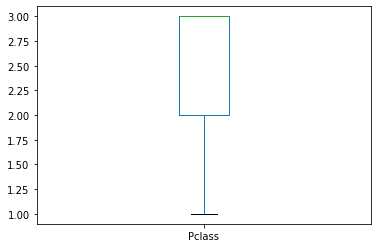

In [52]:
data['Pclass'].plot.box()

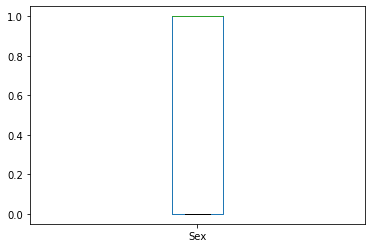

In [53]:
data['Sex'].plot.box()

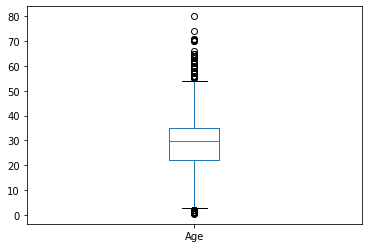

In [54]:
data['Age'].plot.box()

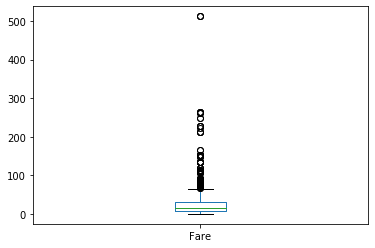

In [55]:
data['Fare'].plot.box()

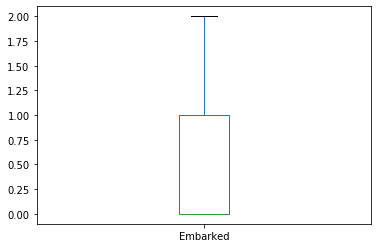

In [56]:
data['Embarked'].plot.box()

### Plotting Boxplot through Iteration

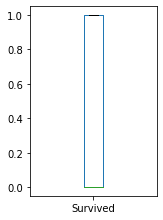

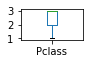

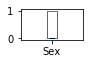

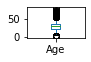

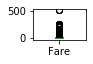

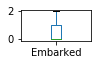

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

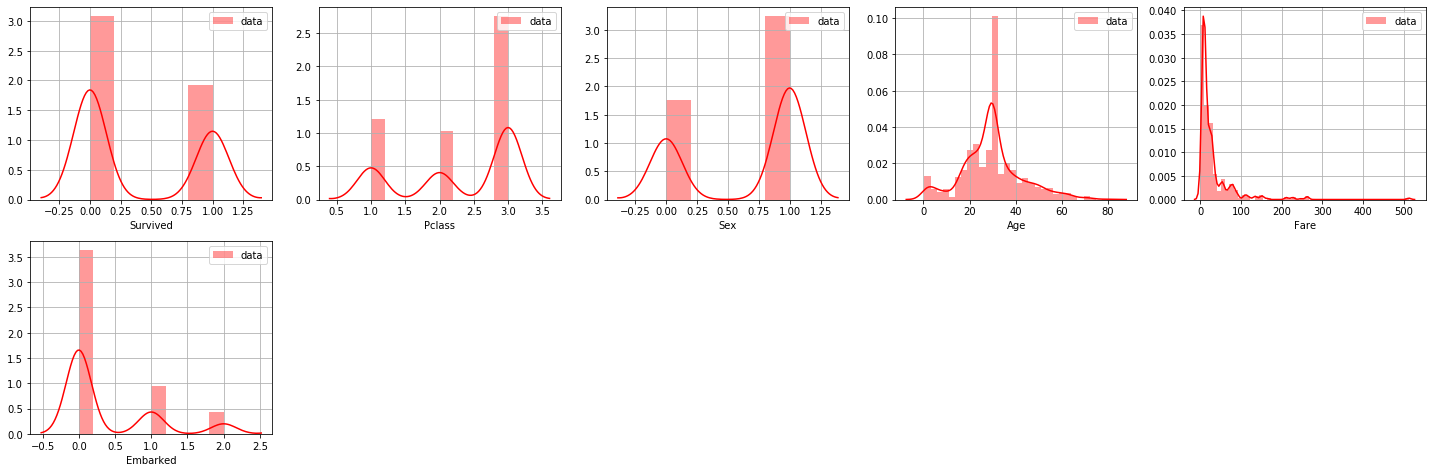

In [58]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [59]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(891, 6)
(864, 6)


In [60]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Fare        4.787317
Embarked    1.543397
dtype: float64

In [61]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [62]:
#Lets Again Check the Skewness
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Fare        0.394928
Embarked    1.254648
dtype: float64

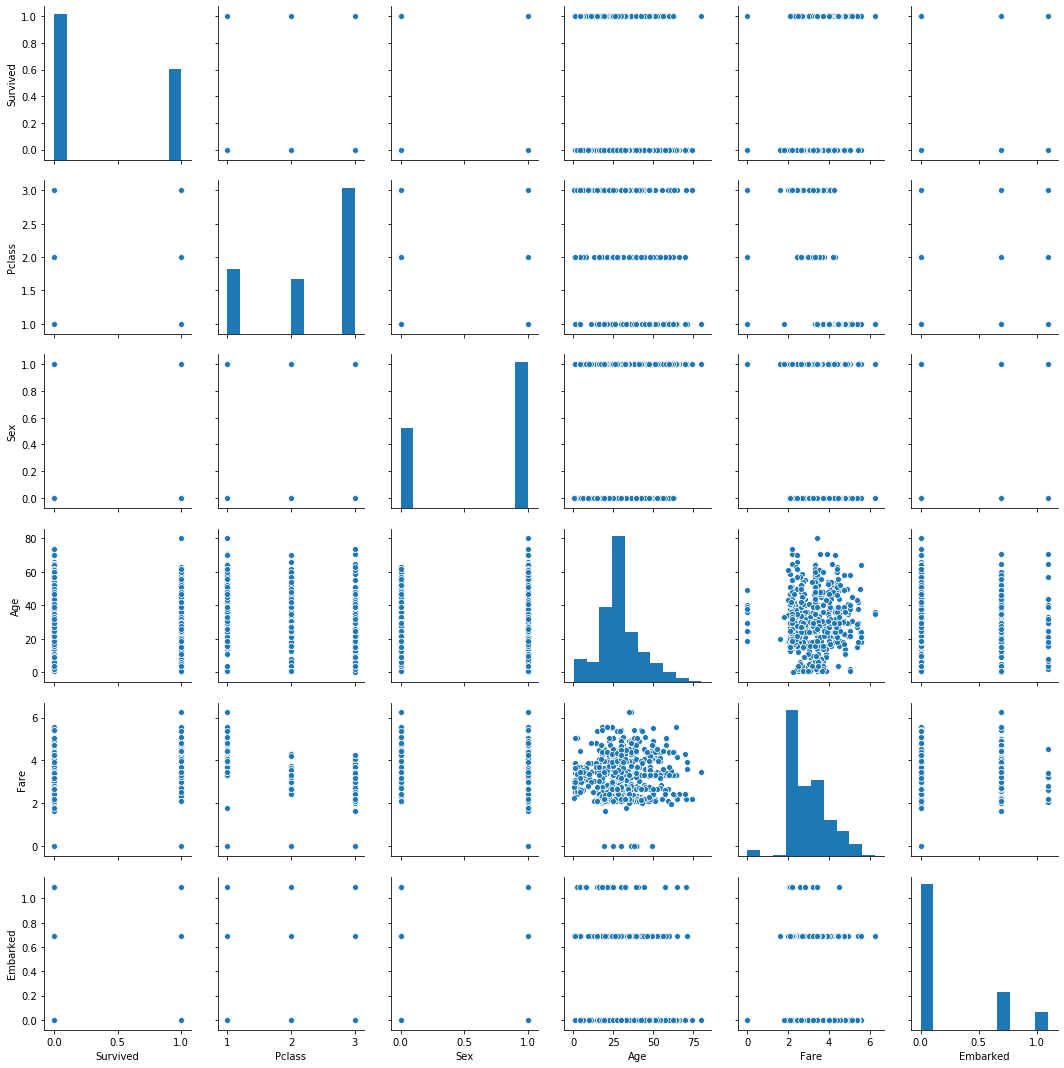

In [63]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

Some More Plots

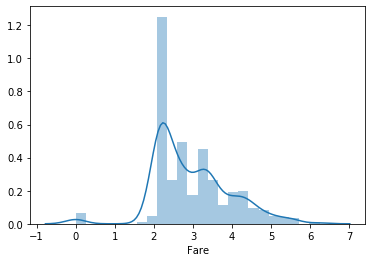

In [64]:
sns.distplot(data['Fare'])

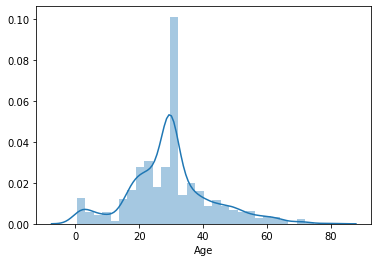

In [65]:
sns.distplot(data['Age'])

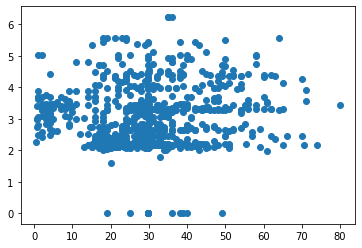

In [66]:
plt.scatter(data['Age'],data['Fare'])

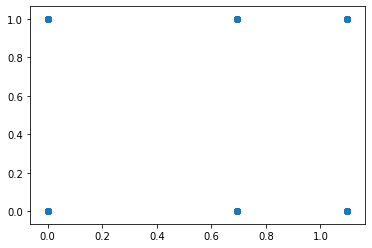

In [67]:
plt.scatter(data['Embarked'],data['Survived'])

Separate the X and Y Variable

In [68]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,2.110213,0.000000
1,1,1,0,38.000000,4.280593,0.693147
2,1,3,0,26.000000,2.188856,0.000000
3,1,1,0,35.000000,3.990834,0.000000
4,0,3,1,35.000000,2.202765,0.000000
...,...,...,...,...,...,...
886,0,2,1,27.000000,2.639057,0.000000
887,1,1,0,19.000000,3.433987,0.000000
888,0,3,0,29.699118,3.196630,0.000000
889,1,1,1,26.000000,3.433987,0.693147


#### Separating X and Y variable

In [69]:
X = data.drop("Survived",axis=1)

In [70]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.000000,2.110213,0.000000
1,1,0,38.000000,4.280593,0.693147
2,3,0,26.000000,2.188856,0.000000
3,1,0,35.000000,3.990834,0.000000
4,3,1,35.000000,2.202765,0.000000
...,...,...,...,...,...
886,2,1,27.000000,2.639057,0.000000
887,1,0,19.000000,3.433987,0.000000
888,3,0,29.699118,3.196630,0.000000
889,1,1,26.000000,3.433987,0.693147


In [71]:
X.shape

(891, 5)

In [72]:
Y = data["Survived"]

In [73]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [74]:
Y.shape

(891,)

In [75]:
Y=Y.values.reshape(-1,1)

In [76]:
Y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [77]:
Y.shape

(891, 1)

In [78]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [79]:
train_X.shape

(694, 5)

In [80]:
test_X.shape

(197, 5)

In [81]:
train_Y.shape

(694, 1)

In [82]:
test_Y.shape

(197, 1)

In [83]:
#Applying Logistic Regression
lg=LogisticRegression()

In [84]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
pred=lg.predict(test_X)
print(pred)

[1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1]


In [86]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.8020304568527918


In [87]:
print(confusion_matrix(test_Y,pred))

[[116  18]
 [ 21  42]]


In [88]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       134
           1       0.70      0.67      0.68        63

    accuracy                           0.80       197
   macro avg       0.77      0.77      0.77       197
weighted avg       0.80      0.80      0.80       197



## Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [89]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.7878844626035637


In [90]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.7945340606532891


### Grid Grid Search Cross Validation for Logistic Regression

In [91]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7939481268011528


In [92]:
lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.8020304568527918


## Boost the Dataset by AdaBoost and GradiantBoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.8314121037463977
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1]


0.8071065989847716

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.9121037463976945
[1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1]


0.8223350253807107

#### Boosting though GradientBoost Regressor By using Parameters

In [95]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))


model_Score: 0.6526163094105759
R2 sq:  0.6526163094105759
Mean squared error: 0.13
Test Variance score: 0.39


#### Lets Visualize the Goodness of the Prediction

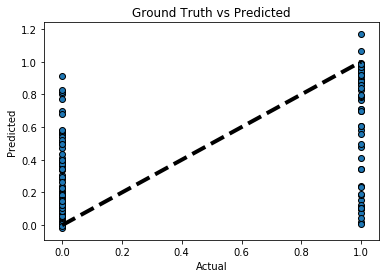

In [97]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

## Prediction Using Naive Bayes Algo

In [98]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.8223350253807107
[[125   9]
 [ 26  37]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       134
           1       0.80      0.59      0.68        63

    accuracy                           0.82       197
   macro avg       0.82      0.76      0.78       197
weighted avg       0.82      0.82      0.81       197



### Multinomial NB by using Crossval Score

In [99]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.73333333 0.73333333 0.76666667 0.76666667 0.78333333 0.81666667
 0.78333333 0.75       0.76666667 0.76271186 0.79661017 0.74576271
 0.77586207 0.75862069 0.79310345]
Mean Scores 0.7688447301772842
Standard deviation 0.022630100730049573
Y Prediction values
[0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0

array([[521,  28],
       [192, 150]], dtype=int64)

### Pediction using Support Vector Machine

In [100]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.7918781725888325
[[111  23]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       134
           1       0.66      0.71      0.69        63

    accuracy                           0.79       197
   macro avg       0.76      0.77      0.77       197
weighted avg       0.80      0.79      0.79       197



### Support Vector Machine by using Crossval Score

In [101]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.72625698 0.79888268 0.78651685 0.7752809  0.83050847]
Mean Scores 0.7834891784379459
Standard Deviation 0.034058305851155865
Y Prediction values
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 

0.7833894500561167

### Use GridSearchCV for Support Vector Machine

In [102]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.603, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.623, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.599, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.597, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.819, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.762, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.827, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.849, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.745, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.805, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.845, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [103]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [104]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       134
           1       0.64      0.70      0.67        63

    accuracy                           0.78       197
   macro avg       0.74      0.76      0.75       197
weighted avg       0.78      0.78      0.78       197



### Prediction Using DecisionTreeClassifier

In [105]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.7614213197969543
[[106  28]
 [ 19  44]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       134
           1       0.61      0.70      0.65        63

    accuracy                           0.76       197
   macro avg       0.73      0.74      0.74       197
weighted avg       0.77      0.76      0.77       197



### DecisionTreeClassifier by using Crossval Score

In [106]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.71333791 0.76416337 0.79118485 0.75431332 0.80455078]
Mean Scores 0.7655100458651404
Standard Deviation 0.031725341327111516
Y Prediction values
[0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 

array([[453,  96],
       [102, 240]], dtype=int64)

### Use GridSearchCV for DecisionTreeClassifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    4.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [108]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 31, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=31,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [109]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       134
           1       0.73      0.70      0.72        63

    accuracy                           0.82       197
   macro avg       0.80      0.79      0.79       197
weighted avg       0.82      0.82      0.82       197



### Boost Decision Tree Classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [111]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8121827411167513


In [113]:
confusion_matrix(test_Y, predictions)

array([[114,  20],
       [ 17,  46]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [114]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.766497461928934
[[108  26]
 [ 20  43]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       134
           1       0.62      0.68      0.65        63

    accuracy                           0.77       197
   macro avg       0.73      0.74      0.74       197
weighted avg       0.77      0.77      0.77       197



### KNN Nearest Neighbor by using Crossval Score 

In [115]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.66666667 0.76666667 0.73033708 0.82022472 0.78651685 0.70786517
 0.82022472 0.71910112 0.79775281 0.80681818]
Mean Scores 0.7622173987061627
Standard Deviation 0.05054842083610216
Y Prediction values
[0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 

array([[455,  94],
       [128, 214]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7666617951528438, 0.7623742540494458, 0.7869102423578127, 0.7593922786505906, 0.7550030446961393, 0.7651479722323712, 0.7767226890756302, 0.7737815126050419, 0.7797034465960297, 0.7494123736451102, 0.759453781512605, 0.7493076360979174, 0.7622281086347582, 0.7507782243332115, 0.7465558397271951, 0.7392662282304225, 0.7307155035927414, 0.7277542321276337, 0.7219565217391305, 0.7247929606625257, 0.7190786749482401, 0.7234064060406772, 0.723343685300207, 0.7233022774327121, 0.7189751552795031, 0.7131780538302277, 0.7131567409572525, 0.6915826330532213, 0.701665448788211, 0.6930739252222629]


In [118]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [119]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [120]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [121]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [122]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)



{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [123]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       134
           1       0.62      0.70      0.66        63

    accuracy                           0.77       197
   macro avg       0.73      0.75      0.74       197
weighted avg       0.78      0.77      0.77       197



### Bagging of KNN Nearest Neighbor 

In [124]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [125]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [126]:
predictions = baggingknn.predict(test_X)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.766497461928934


In [128]:
confusion_matrix(test_Y, predictions)

array([[119,  15],
       [ 31,  32]], dtype=int64)

### Prediction Using RandomForest Classification

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.7918781725888325
[[108  26]
 [ 15  48]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       134
           1       0.65      0.76      0.70        63

    accuracy                           0.79       197
   macro avg       0.76      0.78      0.77       197
weighted avg       0.80      0.79      0.80       197



### RandomForestClassifier Using Cross_Val_Score

In [130]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.78888889 0.83333333 0.7752809  0.83146067 0.86516854 0.80898876
 0.80898876 0.74157303 0.84269663 0.84090909]
Mean Scores 0.8137288616502101
Standard Deviation 0.03502764620867138
Y Prediction values
[0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 

array([[485,  64],
       [ 95, 247]], dtype=int64)

### Use GridSearchCV for Random Forest Classifier

In [131]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [132]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [133]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       134
           1       0.68      0.68      0.68        63

    accuracy                           0.80       197
   macro avg       0.77      0.77      0.77       197
weighted avg       0.80      0.80      0.80       197



#### Bagging of Random Forest Classifier 

In [134]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [135]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [136]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.7715736040609137


In [138]:
confusion_matrix(test_Y, predictionsrf)

array([[113,  21],
       [ 24,  39]], dtype=int64)

#### NOTE::Among all models modelgb gives the Highest accuracy(82.23%) so we are going to save this model

In [139]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(modelgb,'titanic.pkl')

['titanic.pkl']